
# Karthika Pai
# Assignment 2

## Part 1: Image Processing Basics

Computers use tiny dots called _pixels_ to display images. Each pixel is stored as an array of numbers that represent color intensities.

__Example.__ In an 8-bit grayscale image, each pixel is a single number. The number represents light intensity ranging from black (0) to white (255).

__Example.__ In a 24-bit RGB color image, each pixel is an array of 3 numbers. These numbers range from 0 to 255 and represent red, green, and blue intensity, respectively. For instance, `(0, 0, 255)` is <span style="color:#00F">bright blue</span> and `(255, 128, 0)` is <span style="color:#FF8000">orange</span>.

In this assignment, you'll use Python and NumPy to manipulate 24-bit RGB color images.

You can use `Image.open()` from the Python imaging library (PIL) to open an image:

In [129]:
from PIL import Image

# Cat image from https://unsplash.com/photos/FqkBXo2Nkq0
cat_img = Image.open("cat.png")
width, height = cat_img.size

print width, height

400 267


Images display inline in Jupyter notebooks:

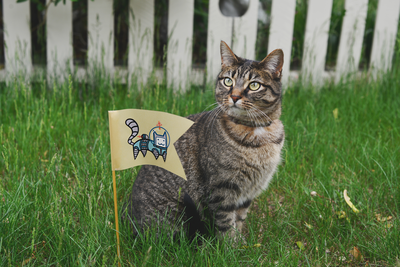

In [130]:
cat_img

In a Python terminal, you can display the image in a new window with `.show()` instead.

NumPy can convert images to arrays:

In [131]:
import numpy as np

cat = np.array(cat_img)
print cat.shape

(267, 400, 3)


To convert an array back to an image (for display) use the function below:

In [132]:
def as_image(x):
    """Convert an ndarray to an Image.
    
    Args:
        x (ndarray): The array of pixels.
        
    Returns:
        Image: The Image object.
    """
    return Image.fromarray(np.uint8(x))

__Exercise 1.1.__ How many dimensions does the `cat` array have? What does each dimension represent?

The cat array is 267 units long by 400 units wide. Thus, the array is 267x400x3. Each unit is composed of 3 elements - which is an array of 3 colors as stated above. 267 represents the length, 400 the width and 3 the characteristics of a pixel (how much red, green, blue it has).

__Exercise 1.2.__ Use `.copy()` to copy the cat array to a new variable. Swap the green and blue color channels in the copy. Display the result.

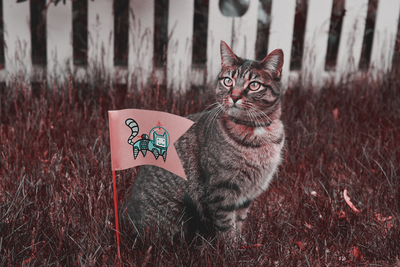

In [133]:
cat2 = np.copy(cat)
#swap the green and blue channels

cat2[:,:, 1], cat2[:,:,2] = cat2[:,:,2], cat2[:,:, 1] #swap with tuples
        
as_image(cat2)



__Exercise 1.3.__ Why is `.copy()` necessary in exercise 1.2? What happens if you don't use `.copy()`?

Lots of reasons why .copy is needed in 1.2. Using .copy and forming a new copy of the cat array puts into a play an attribute called (__setitem__). __setitem__ changes the underlying data structure without reassigning anything or changing the original cat array. If make a new array, say redblueswitch and use an equal sign to assign it to the original array (redblueswitch = cat instead of redblueswitch = np.copy(cat)), we have the original array changing when there is any change redblueswitch. 

__Exercise 1.4.__ Flip the blue color channel from left to right. Display the resulting image. _Hint: see the NumPy documentation on array manipulation routines._

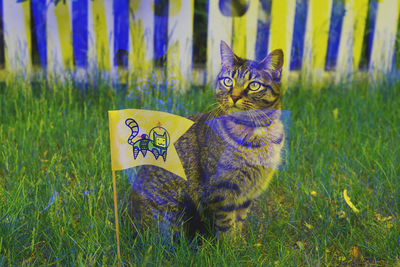

In [134]:
cat3 = np.copy(cat)
#cat3[:,:, 2], cat3[:,:,0] = cat3[:,:,0], cat3[:,:, 2] #rgb becomes bgr again using tuple swap

cat3[:,:,2] = np.fliplr(cat3[:,:,2])
as_image(cat3)

## Part 2: Singular Value Decomposition

Suppose $X$ is an $n \times p$ matrix (for instance, one color channel of the cat image). The _singular value decomposition_ (SVD) factors $X$ as $X = UD V^T$, where:

* $U$ is an $n \times n$ orthogonal matrix
* $D$ is an $n \times p$ matrix with zeroes everywhere except the diagonal
* $V$ is an $p \times p$ orthogonal matrix

Note that a matrix $A$ is _orthogonal_ when $A^T A = I$ and $AA^T = I$.

__Example.__ We can use NumPy to compute the SVD for a matrix:

In [135]:
x = np.array(
    [[0, 2, 3],
     [3, 2, 1]]
)
u, d, vt = np.linalg.svd(x)
# Here d is 2x2 because NumPy only returns the diagonal of D.
print "u is:\n", u, "\nd is:\n", d, "\nv^T is:\n", vt


u is:
[[-0.68145174 -0.73186305]
 [-0.73186305  0.68145174]] 
d is:
[ 4.52966162  2.54600974] 
v^T is:
[[-0.48471372 -0.62402665 -0.6128975 ]
 [ 0.80296442 -0.03960025 -0.59470998]
 [ 0.34684399 -0.78039897  0.52026598]]


If we let

* $u_i$ denote the $i$th column of $U$
* $d_i$ denote the $i$th diagonal element of $D$
* $v_i$ denote the $i$th column of $V$

then we can write the SVD as $\ X = UDV^T = d_1 u_1 v_1^T + \ldots + d_m u_m v_m^T\ $ using the rules of matrix multiplication. In other words, the SVD decomposes $X$ into a sum!

If we eliminate some of the terms in the sum, we get a simple approximation for $X$. For instance, we could eliminate all but first 3 terms to get the approximation $X \approx d_1 u_1 v_1^T + d_2 u_2 v_2^T + d_3 u_3 v_3^T$. This is the same as if we:

* Zero all but the first 3 diagonal elements of $D$ to get $D_3$, then compute $X \approx UD_3V^T$
* Eliminate all but the first 3 columns of $V$ to get $p \times 3$ matrix $V_3$, then compute $X \approx UDV_3^T$

We always eliminate terms starting from the end rather than the beginning, because these terms contribute the least to $X$.

Why would we want to approximate a matrix $X$?

In statistics, _principal components analysis_ uses this approximation to reduce the dimension (number of covariates) in a  centered (mean 0) data set. The vectors $d_i u_i$ are called the _principal components_ of $X$. The vectors $v_i^T$ are called the _basis vectors_. Note that both depend on $X$. The dimension is reduced by using the first $q$ principal components instead of the original $p$ covariates. In other words, the $n \times p$ data $X$ is replaced by the $n \times q$ data $UD_q = XV_q$

In computing, this approximation is sometimes used to reduce the number of bits needed to store a matrix (or image). If $q$ terms are kept, then only $nq + pq$ values (for $XV_q$ and $V_q^T$) need to be stored instead of the uncompressed $np$ values.

__Exercise 2.1.__ Write the functions described below.

* A function that takes a matrix $X$ and returns its principal component matrix $XV_q$ and basis matrix $V_q^T$. This function should also take the number of terms kept $q$ as an argument.

* A function that takes a principal component matrix $XV_q$ and basis matrix $V_q^T$ and returns an approximation $\hat{X}$ for the original matrix.

As usual, make sure to document your functions. Test your function on the red color channel of the cat image. What's the smallest number of terms where the cat is still recognizable as a cat?

The number of terms in which cat is still recognizable as a cat, at least to me, is 18.


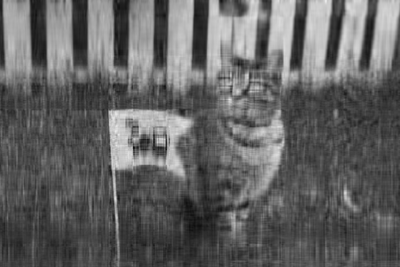

In [136]:
test_matrixy = np.copy(cat) # make copy of cat
red = test_matrixy[:,:,0] #only red channel

def pca_analyze(matrix, q):
    '''Takes a matrix X and returns principal component matrix
    and basis matrix
    
    Input: matrix, integer number of terms
    Output: two matrixes, pricipal component and basis based on q/# of columns'''
    u, d, vt = np.linalg.svd(matrix)
    v = np.transpose(vt) #transpose Vt to get V
    k = np.dot(matrix, v[:,0:q]) # v[:,0:q] = Vq, dot multiply by X to get Xvq, only look at first q terms
    return (k, np.transpose(v[:,0:q])) # returns XVq and Vtq                                        

def approximation(pca, basis, terms):
    '''Takes a pca and basis matrix and returns an approximation  X̂ 
      for the original matrix
      Input: Two matrixes - pca and basis of original image
      Output: approximation of x as an array and an image'''
    approx = np.dot(pca, basis) # dot multiply pca and basis array
    return approx, as_image(approx)

print "The number of terms in which cat is still recognizable as a cat, at least to me, is 18."
pca, basis = pca_analyze(red,18)
matrix, picture_compressed = approximation(pca, basis, 18)
picture_compressed

__Exercise 2.2.__ You can check the number of bytes used by a NumPy array with the `.nbytes` attribute. How many bytes does the red color channel of the cat image use? How many bytes does the compressed version use when 10 terms are kept? What percentage of the original size is this?

In [138]:
redtotal = red.nbytes
print redtotal #original array

pca, basis = pca_analyze(matrix10, 10) #get basis and pca array of pic matrix
matrix10, picture10 = approximation(pca, basis, 10) #calculate pic for 10 terms

total_compressed = pca.nbytes + basis.nbytes
print total_compressed #compressed bytes

print total_compressed/float(redtotal) * 100 #percentage

106800
53360
49.9625468165


Original number of bytes for X or only the red channel is 106800 bytes.

The number of bytes for compressed image when only 10 terms are kept is 53360.

That is roughly 49.96% or approximately half the size of the original size. Compression works!